In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [25]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [12]:
df_ROS.info()
## 가족력, 간질성폐질환, 고혈압여부, 당뇨여부, 말초동맥질환여부, 빈혈여부, 성별, 스테로이드치료, 신부전여부, 심혈관질환여부, 암발병여부, 우울증여부

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

## quest_1

- 선정변수: 목표 -체중(연속형) / 설정 - 재발여부(범주형) 
    - 검증
       - 1: 체중_연속형: 단일변수_비정규분포
       - 2: 재발여부_범주형: 단일변수_비정규분포 
        

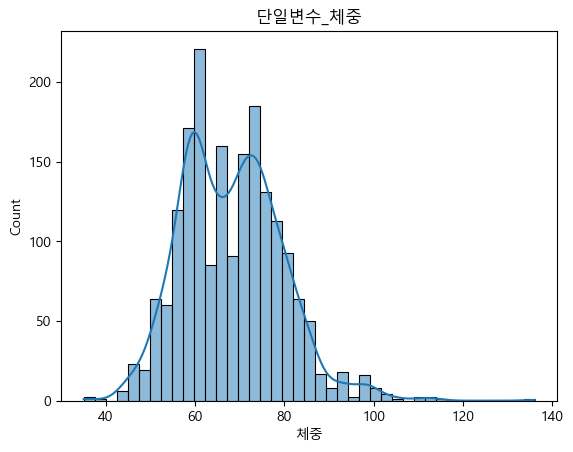

In [24]:
sns.histplot(data=df_ROS, x= '체중', kde=True)
plt.title('단일변수_체중')
plt.show()

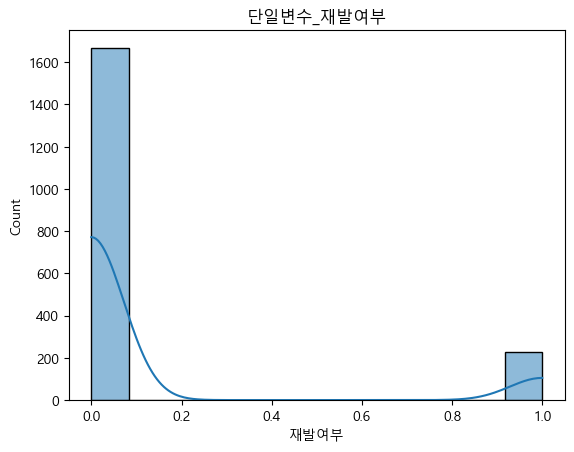

In [41]:
sns.histplot(data=df_ROS, x= '재발여부', kde=True)
plt.title('단일변수_재발여부')
plt.show()

In [27]:
# 5000개 이하면 shapiro
stats.shapiro(df_ROS['체중'])

ShapiroResult(statistic=0.9795888662338257, pvalue=8.319101268931405e-16)

In [29]:
df_ROS.isnull().sum()

Unnamed: 0                   0
환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
수술기법                        81
수술시간    

## 범주형-연속형: 재발여부-체중 
### 체중: 비정규 - 재발여부: 2 집단 비교_Wilcoxon Test 진행. 
#### 선정변수 
        1. '체중' (연속), '재발여부' (범주)
            → 분석 내용: 재발여부에 따른 체중 변화?
                - 귀무가설: 재발여부에 9.368754421483853e-09 체중 변화없음
                - 대립가설: 재발여부에 따른 체중 변화있음
            → 분석 결론 (p-value : 0.05 ?), stats.ranksums ('비교[연속형]', '비교[연속형]')
                ⇒ RanksumsResult(statistic=-5.741778092219353, pvalue=9.368754421483853e-09)
                - 통계 결론: p-value 9.368754421483853e-09로 대립가설이 참이다.  
                - 사실 결론: 재발여부에 따른 체중변화 있다. 

In [35]:
df_weight_re = df_ROS[['체중', '재발여부']]
df_weight_re['재발여부'].value_counts()

0    1667
1     227
Name: 재발여부, dtype: int64

In [36]:
conditions = (df_weight_re['재발여부'] == 0)
df_re_none = df_weight_re[conditions]
df_re_none

,체중,재발여부
0,60.3,0
1,71.7,0
2,77.1,0
3,74.2,0
4,80.7,0
...,...,...
1889,64.0,0
1890,59.0,0
1891,70.0,0
1892,77.0,0


In [37]:
conditions = (df_weight_re['재발여부'] == 1)
df_re_yes = df_weight_re[conditions]
df_re_yes

,체중,재발여부
28,77.8,1
40,80.2,1
41,56.0,1
58,74.6,1
65,59.0,1
...,...,...
1868,100.0,1
1875,94.0,1
1881,62.0,1
1883,66.0,1


In [38]:
## y_연속형 정규형 검정했을 때, x는 비모수적 검증 진행. 
stats.ranksums(df_re_none['체중'],df_re_yes['체중'])

RanksumsResult(statistic=-5.741778092219353, pvalue=9.368754421483853e-09)

<Axes: xlabel='재발여부', ylabel='체중'>

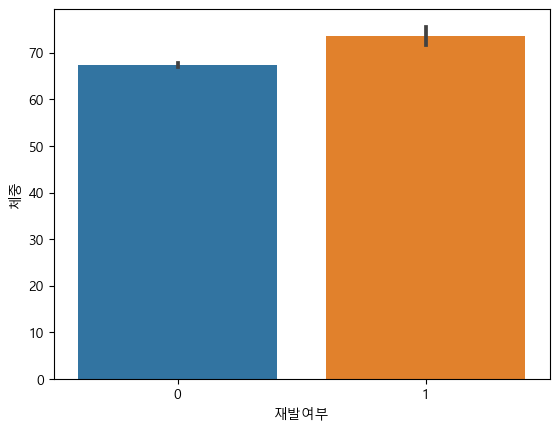

In [51]:
sns.barplot(data=df_weight_re, x='재발여부', y='체중')

### 강사님 Quest tip
단일변수_체중에서 hue로 비교해서 범주형 정규분포 찾아보기
###### 가족력, 간질성폐질환, 고혈압여부, 당뇨여부, 말초동맥질환여부, 빈혈여부, 성별, 스테로이드치료, 신부전여부, 심혈관질환, 암발병여부, 우울증여부, 흡연여부, 과거수술횟수, Location of herniation, 혈액형, 수술실패여부, 직업
    - my picks : 성별, 스테로이드, 과거 수술 횟수, location, 혈액형

<Axes: xlabel='체중', ylabel='Count'>

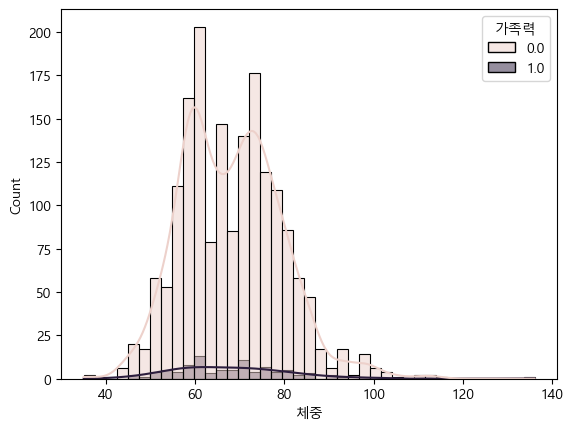

In [54]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='가족력')

<Axes: xlabel='체중', ylabel='Count'>

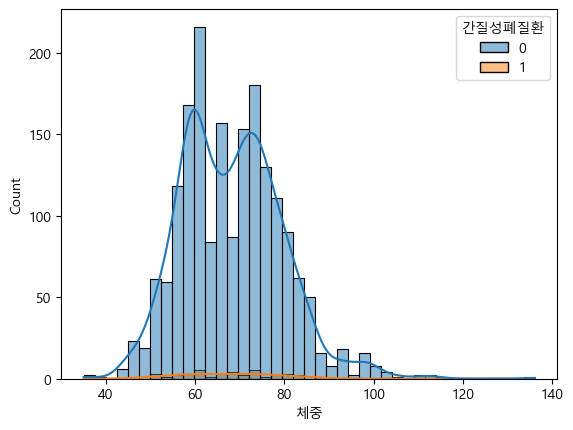

In [55]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='간질성폐질환')

<Axes: xlabel='체중', ylabel='Count'>

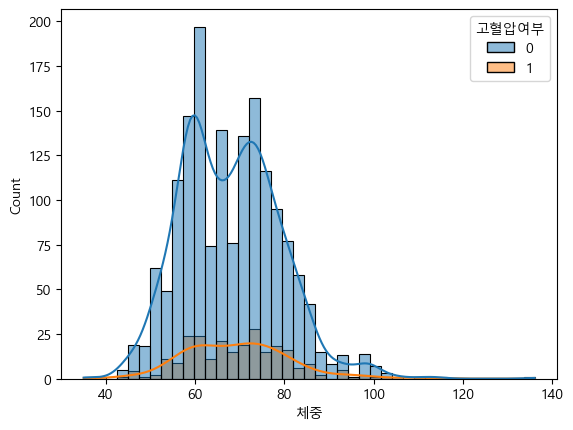

In [56]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='고혈압여부')

<Axes: xlabel='체중', ylabel='Count'>

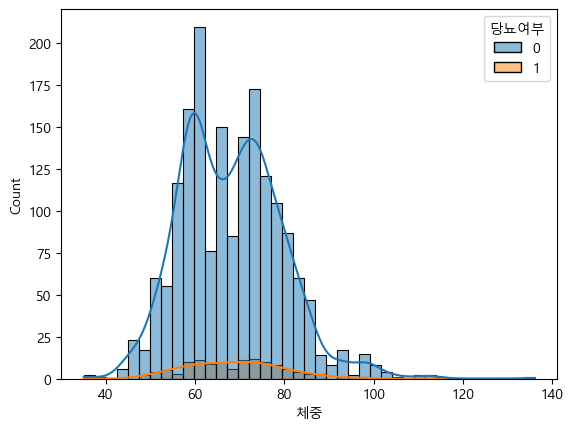

In [58]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='당뇨여부')

<Axes: xlabel='체중', ylabel='Count'>

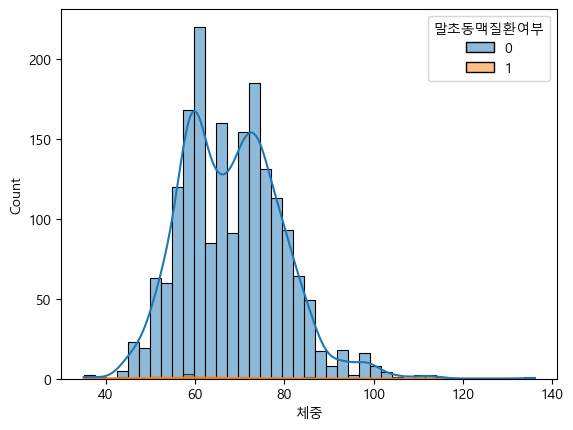

In [59]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='말초동맥질환여부')

<Axes: xlabel='체중', ylabel='Count'>

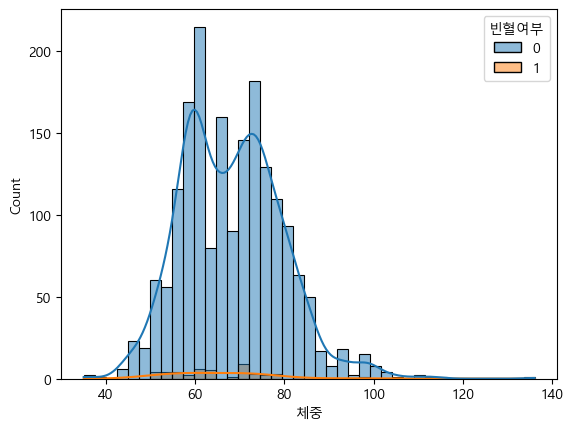

In [60]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='빈혈여부')

<Axes: xlabel='체중', ylabel='Count'>

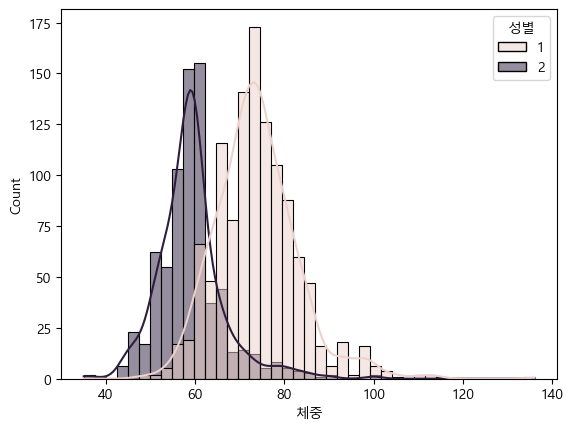

In [67]:
##
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='성별')

<Axes: xlabel='체중', ylabel='Count'>

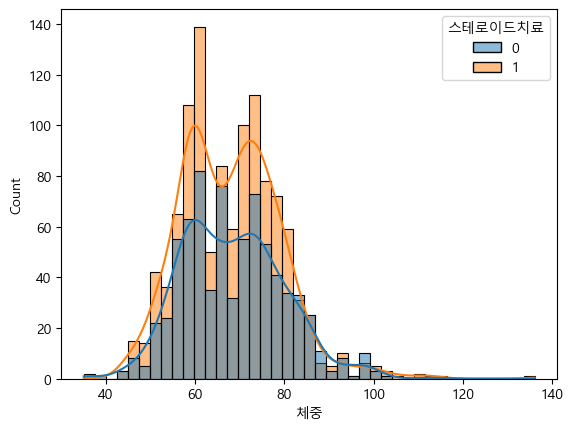

In [68]:
##
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='스테로이드치료')

<Axes: xlabel='체중', ylabel='Count'>

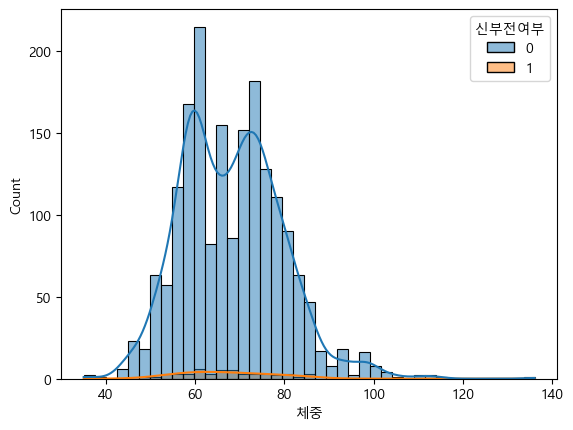

In [63]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='신부전여부')

<Axes: xlabel='체중', ylabel='Count'>

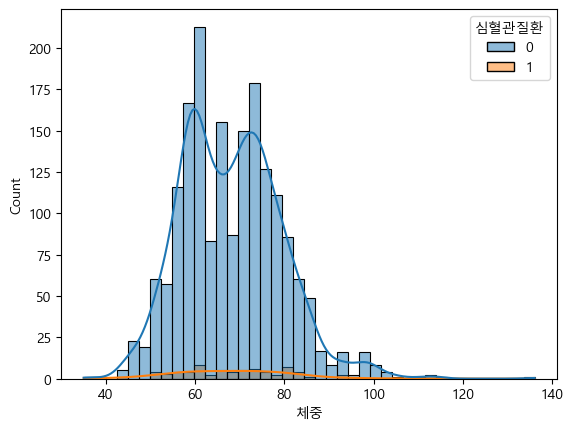

In [66]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='심혈관질환')

<Axes: xlabel='체중', ylabel='Count'>

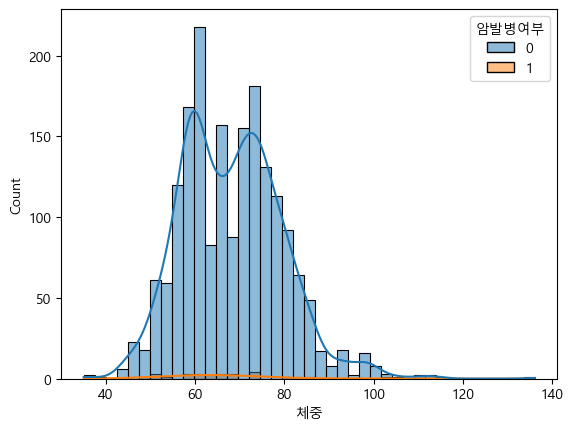

In [69]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='암발병여부')

<Axes: xlabel='체중', ylabel='Count'>

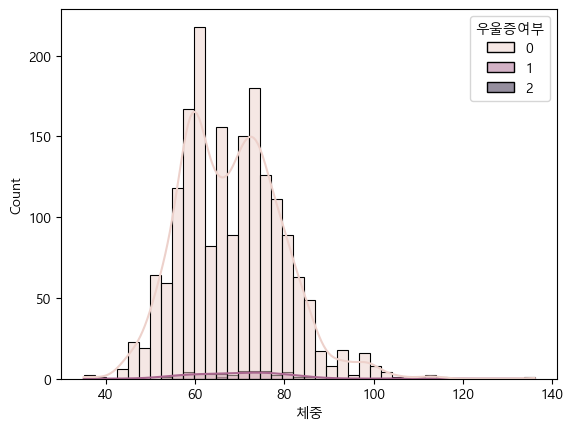

In [70]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='우울증여부')

<Axes: xlabel='체중', ylabel='Count'>

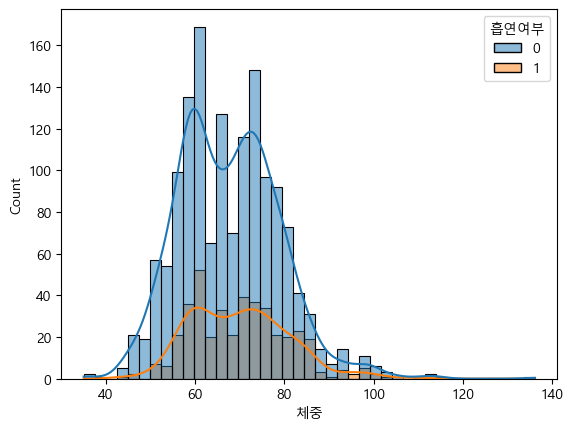

In [71]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='흡연여부')

<Axes: xlabel='체중', ylabel='Count'>

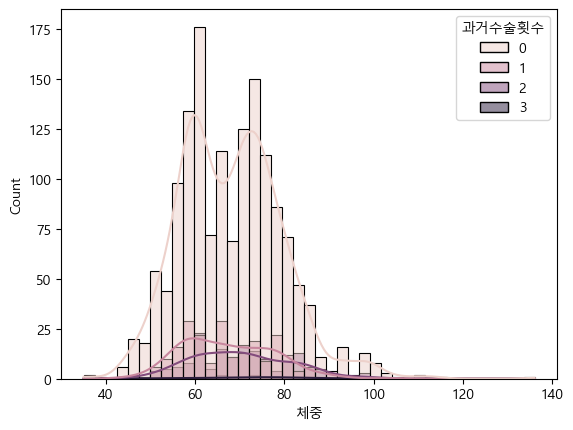

In [73]:
##
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='과거수술횟수')

<Axes: xlabel='체중', ylabel='Count'>

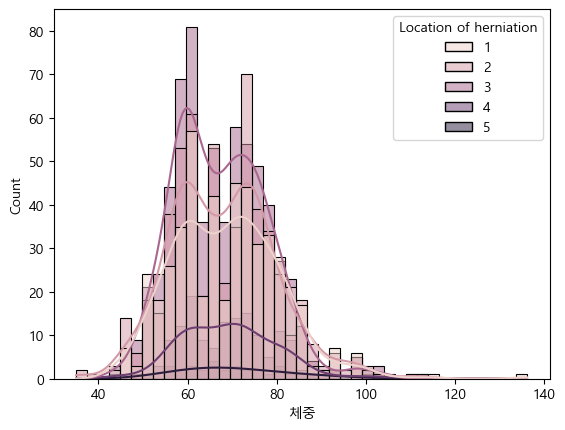

In [75]:
##
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='Location of herniation')

<Axes: xlabel='체중', ylabel='Count'>

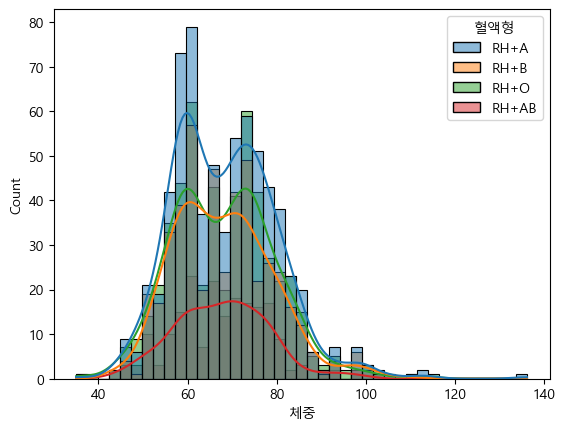

In [77]:
##
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='혈액형')

<Axes: xlabel='체중', ylabel='Count'>

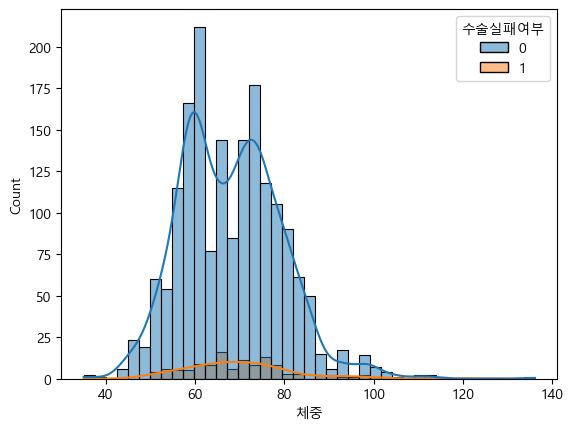

In [78]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='수술실패여부')

<Axes: xlabel='체중', ylabel='Count'>

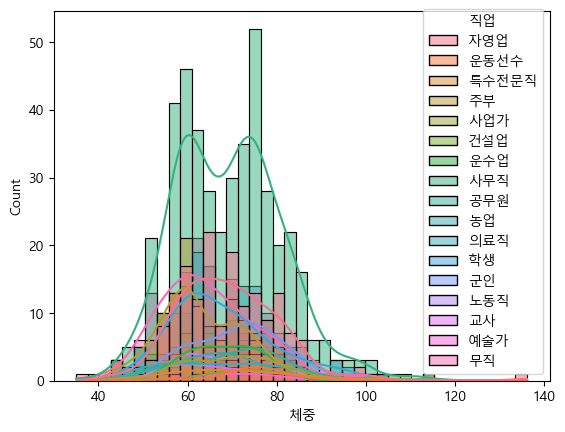

In [79]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='직업')

## 범주형-연속형: 성별-체중 
### 체중: 비정규 - 성별: 2 집단 비교_Wilcoxon Test 진행. 
#### 선정변수 
        1. '체중' (연속), '성별' (범주)
            → 분석 내용: 성별에 따른 체중 변화?
                - 귀무가설: 성별에 따른 체중 변화없음
                - 대립가설: 성별에 따른 체중 변화있음
            → 분석 결론 (p-value : 0.05 ?), stats.ranksums ('비교[연속형]', '비교[연속형]')
                ⇒RanksumsResult(statistic=-30.030787084514557, pvalue=3.890904826784808e-198)
                - 통계 결론: p-value 3.890904826784808e-198로 대립가설 참 
                - 사실 결론: 성별에 따른 체중 변화있음 

In [88]:
df_gen_weight = df_ROS[['체중','성별']]
df_gen_weight

,체중,성별
0,60.3,2
1,71.7,1
2,77.1,1
3,74.2,1
4,80.7,1
...,...,...
1889,64.0,2
1890,59.0,2
1891,70.0,1
1892,77.0,1


In [89]:
conditions = (df_gen_weight['성별'] == 1)
df_M_weight = df_gen_weight[conditions]
df_M_weight

,체중,성별
1,71.7,1
2,77.1,1
3,74.2,1
4,80.7,1
6,74.8,1
...,...,...
1883,66.0,1
1885,75.0,1
1888,63.0,1
1891,70.0,1


In [90]:
conditions = (df_gen_weight['성별'] == 2)
df_W_weight = df_gen_weight[conditions]
df_W_weight

,체중,성별
0,60.3,2
5,60.8,2
10,59.5,2
14,58.4,2
19,59.9,2
...,...,...
1886,56.0,2
1887,56.0,2
1889,64.0,2
1890,59.0,2


In [91]:
## y_연속형 정규형 검정했을 때, x는 비모수적 검증 진행. 
stats.ranksums(df_W_weight['체중'],df_M_weight['체중'])

RanksumsResult(statistic=-30.030787084514557, pvalue=3.890904826784808e-198)

## 범주형-연속형: 스테로이드치료-체중 
### 체중: 비정규 - 스테로이드치료: 2 집단 비교_Wilcoxon Test 진행. 
#### 선정변수 
        1. '체중' (연속), '스테로이드치료' (범주)
            → 분석 내용: 스테로이드치료여부에 따른 체중 변화?
                - 귀무가설: 스테로이드치료여부에 따른 체중 변화없음
                - 대립가설: 스테로이드치료여부에 따른 체중 변화있음
            → 분석 결론 (p-value : 0.05 ?), stats.ranksums ('비교[연속형]', '비교[연속형]')
                ⇒RanksumsResult(statistic=-0.8675532025450969, pvalue=0.3856389746397201)
                - 통계 결론: p-value 0.3856389746397201 로 귀무가설 참 
                - 사실 결론: 스테로이드치료여부에 따른 체중 변화없음

In [94]:
df_weight_steroid = df_ROS[['체중','스테로이드치료']]
df_weight_steroid

,체중,스테로이드치료
0,60.3,1
1,71.7,1
2,77.1,1
3,74.2,0
4,80.7,1
...,...,...
1889,64.0,1
1890,59.0,1
1891,70.0,1
1892,77.0,1


In [96]:
conditions = (df_weight_steroid['스테로이드치료'] == 1)
df_steroid_no = df_weight_steroid[conditions]
df_steroid_no

,체중,스테로이드치료
0,60.3,1
1,71.7,1
2,77.1,1
4,80.7,1
5,60.8,1
...,...,...
1889,64.0,1
1890,59.0,1
1891,70.0,1
1892,77.0,1


In [97]:
conditions = (df_weight_steroid['스테로이드치료'] == 0)
df_steroid_yes = df_weight_steroid[conditions]
df_steroid_yes

,체중,스테로이드치료
3,74.2,0
6,74.8,0
8,69.2,0
10,59.5,0
13,74.6,0
...,...,...
1868,100.0,0
1871,82.0,0
1873,61.0,0
1875,94.0,0


In [98]:
## y_연속형 정규형 검정했을 때, x는 비모수적 검증 진행. 
stats.ranksums(df_steroid_no['체중'],df_steroid_yes['체중'])

RanksumsResult(statistic=-0.8675532025450969, pvalue=0.3856389746397201)

## 범주형-연속형: 체중 - 직업
### 체중: 정규(매우 쪼갬..)- 직업:
#### 선정변수 
        1. '체중' (연속), '직업' (범주) 농업이거나 운동선수이거나 교사이거나. 
            → 분석 내용: Location of herniation 4, 5에 따른 체중 변화?
                - 귀무가설: Location of herniation 4, 5에 따른 체중 변화없음
                - 대립가설: Location of herniation 4, 5에 따른 체중 변화있음
                pass_체중 정규화 하고싶음. 
            → 분석 결론 (p-value : 0.05 ?), stats.ranksums ('비교[연속형]', '비교[연속형]')
                ⇒RanksumsResult(statistic=-0.8675532025450969, pvalue=0.3856389746397201)
                - 통계 결론: p-value 0.3856389746397201 로 귀무가설 참 
                - 사실 결론: 스테로이드치료여부에 따른 체중 변화없음

<Axes: xlabel='체중', ylabel='Count'>

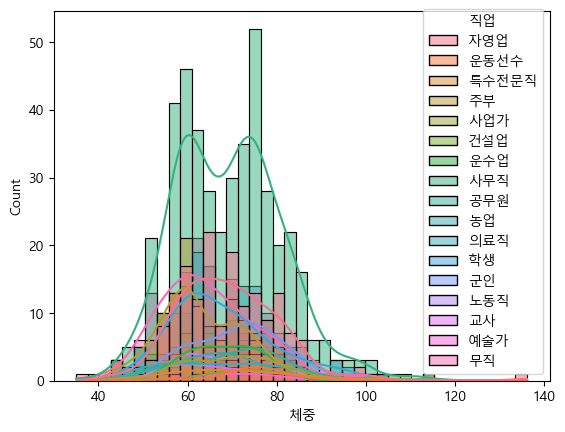

In [226]:
sns.histplot(data=df_ROS, x= '체중', kde=True, hue='직업')

In [234]:
conditions = (df_ROS['직업'] == '주부')|(df_ROS['직업'] == '무직') | (df_ROS['직업'] == '학생')
df_ROS_job1 = df_ROS[conditions]
df_ROS_job1

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
15,15,16PT,23.3,4,22.0,0.0,0,0,0,0,...,2,40.2,14.1,13.8,0,-2.12,2155.30,4,Down,0
16,16,17PT,45.4,3,NaN,0.0,0,0,0,0,...,0,38.8,12.7,14.7,0,-1.52,2408.90,4,Down,0
36,36,37PT,25.2,3,NaN,0.0,0,0,0,0,...,0,31.8,6.0,16.8,0,-1.17,2086.90,4,Middle,0
41,41,42PT,22.0,3,NaN,0.0,0,0,0,0,...,0,46.0,24.0,6.0,1,-2.33,1602.69,4,Down,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1882,1883PT,35.4,4,NaN,0.0,0,0,1,0,...,0,44.5,17.6,21.2,0,NaN,1736.10,4,Middle,0
1886,1886,1887PT,49.9,2,NaN,0.0,0,0,0,0,...,0,37.3,3.6,31.5,0,NaN,1857.50,5,Down,0
1887,1887,1888PT,49.9,2,NaN,0.0,0,0,1,0,...,0,37.3,3.6,31.5,0,NaN,1858.10,5,Down,0
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0


<Axes: xlabel='체중', ylabel='Count'>

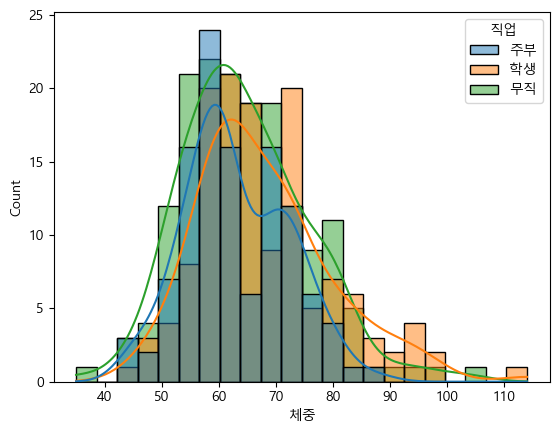

In [235]:
sns.histplot(data=df_ROS_job1, x= '체중', kde=True, hue='직업')

In [237]:
stats.shapiro(df_ROS_job1['체중'])

ShapiroResult(statistic=0.9687420725822449, pvalue=1.0108875159176023e-07)

In [238]:
# Q1 = df_ROS['체중'].describe()['25%']
# Q3 = df_ROS['체중'].describe()['75%']
# conditions = (df_ROS['체중'] > Q1) & (df_ROS['체중'] < Q3)
# df_ROS_con = df_ROS[conditions]
# df_ROS_con

In [239]:
# conditions = (df_ROS_con['직업'] == '공무원')|(df_ROS_con['직업'] == '노동직') | (df_ROS_con['직업'] == '')
# df_ROS_job = df_ROS_con[conditions]
# df_ROS_job